In [2]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random, Plots.Measures

In [3]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [4]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

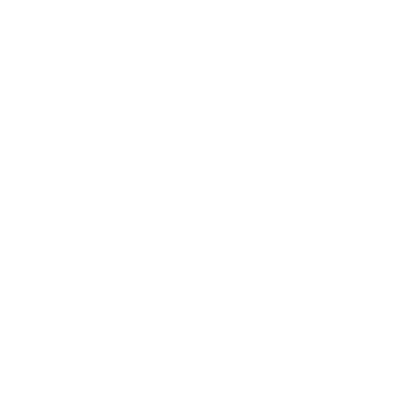

In [5]:
# Define the plot
num_points = 20

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 400) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2],
legend=:none, grid=false, ticks=:none, ratio=:equal,
    cb=:none, size=(400, 400), margins=-2mm, frame=:none)

In [6]:
ops = gaussian_operators_2D(0.08, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.06216989964527163, Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.06216989964527163, Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.06216989964527163, Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#adjΦ#38"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#30#39"{var"#ϕ#32"{Int64}}}([0.0 0.05 … 0.95 1.0; 0.0 0.05 … 0.95 1.0; … ; 0.0 0.05 … 0.95 1.0; 0.0 0.05 … 0.95 1.0], [0.0 0.0 … 0.0 0.0; 0.05 0.05 … 0.05 0.05; … ; 0.95 0.95 … 0.95 0.95; 1.0 1.0 … 1.0 1.0], var"#adjΦ#30#39"{var"#ϕ#32"{Int64}}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, 

## Pre-certificate

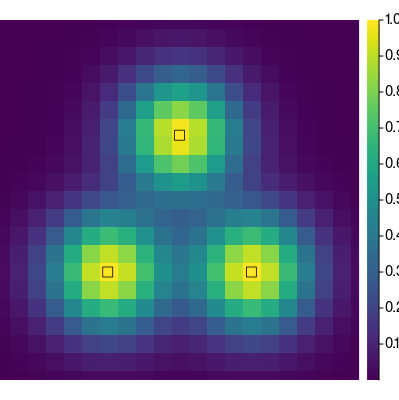

In [7]:
x0 = [[0.3, 0.5, 0.7], [0.3, 0.68, 0.3]]
a0 = [1.0, 1.0, 1.0]

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

### SFW

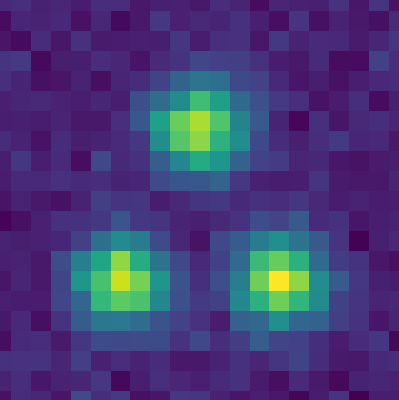

In [13]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.2
y = add_noise(y0, noise_level)
δ = noise_level * norm(y)

plt_obs = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y, size(plt_grid_x1)), color=:viridis)
# plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square, markersize=5, markerstrokewidth=1)

In [ ]:
prob = BLASSO(y, ops, domain)

BLASSO([-0.0033797388108777926, 0.0004702051996681441, 0.0038815906307057666, -0.004231794307695634, -0.0018728616471482807, -0.0002402399829227968, -0.0024461883540788103, -0.0002165635049518672, 0.0005031158427437633, -0.0059563545889889285  …  0.0008295567413194905, -0.0006041242734454373, -0.0019378530079789795, 0.001057869578448365, -7.03265564218687e-5, 0.002688612393831416, 0.003203339366139274, 0.004923071602767592, 0.002405169478360822, -0.0029401766178792717], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.06216989964527163, Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.06216989964527163, Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.05; … ; 1.0 0.95; 1.0 1.0], 78.125)), 441), Core.Box(var"#gauss2D#31"{Float64, Matrix{Float64}, Float64}(0.062169899645271

In [ ]:
plt_cert_behav = deepcopy(plt_obs)

solve!(prob, :SFW, options=Dict(:maxits => 10, :δ => δ, :τ => 1.1, :q => 0.8))
# plot_spikes!(plt_cert_behav, prob.μ, label=L"\hat{μ}", marker=:circle)

λ: 1
  0.010333 seconds (7.24 k allocations: 8.281 MiB)
r: 0.3147714800535702
τδ: 0.06358383897082119
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 0.8
  0.014250 seconds (7.25 k allocations: 8.281 MiB)
r: 0.3147714800535702
τδ: 0.06358383897082119
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 0.6400000000000001
  0.016182 seconds (7.25 k allocations: 8.281 MiB)
r: 0.3147714800535702
τδ: 0.06358383897082119
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 0.5120000000000001
  0.017389 seconds (7.25 k allocations: 8.281 MiB)
r: 0.3147714800535702
τδ: 0.06358383897082119
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 0.40960000000000013
  0.020379 seconds (7.25 k allocations: 8.281 MiB)
r: 0.3147714800535702
τδ: 0.06358383897082119
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 0.32768000000000014
  0.510915 seconds (7.29 k allocations: 8.283 MiB, 97.92% gc time, 1.24% compilatio

ArgumentError: ArgumentError: Regularisation parameter λ has become too small.

In [10]:
red_cmap = cgrad([RGB(0, 0, 0), RGB(1, 0, 0)])

red_cmap = cgrad([RGB(1, 0, 0), RGB(0, 0, 0)])

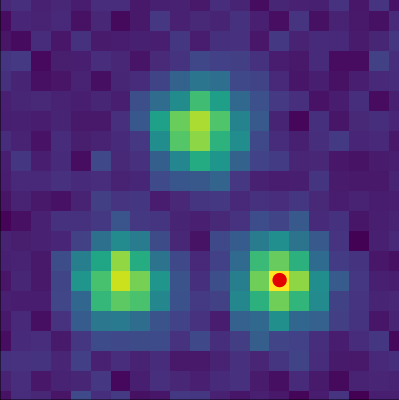

In [19]:
λ = 0.031
# λ = 0.002417851639229262
# λ = 0.001

plt_sol1 = deepcopy(plt_obs)

prob_copy1 = deepcopy(prob)
prob_copy1.λ = λ
solve!(prob_copy1, :SFW, options=Dict(:descent => :BFGS, :maxits => 6, :positivity => true))

# display(prob_copy1.μ.a)
# display(prob_copy1.μ.a .* maximum(y))
# display(maximum(y))

scatter!(plt_sol1,
    inset=(bbox(0, 0, 1, 1, :bottom)), bgcolor=:transparent,
    prob_copy1.μ.x...,
    zcolor=prob_copy1.μ.a .* maximum(y),
    color=red_cmap,
    legend=:none, grid=false, ticks=:none, ratio=:equal,
    cb=:none, size=(400, 400), margins=-5mm, frame=:none,
    marker=:circle,
    markersize=8, markerstrokewidth=0)

In [20]:
savefig(plt_sol1, "../figures/Morozov/Poster/Too_big_λ.svg")
# savefig(plt_sol1, "../figures/Morozov/Poster/Optimal_λ.svg")
# savefig(plt_sol1, "../figures/Morozov/Poster/Too_small_λ.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\Morozov\\Poster\\Too_big_λ.svg"

In [21]:
λs = [100.0, 80.0, 64.0, 51.2, 40.96000000000001, 32.76800000000001, 26.21440000000001, 20.97152000000001, 16.777216000000006, 13.421772800000006, 10.737418240000006, 8.589934592000004, 6.871947673600004, 5.497558138880003, 4.398046511104003, 3.5184372088832023, 2.814749767106562, 2.25179981368525, 1.8014398509482001, 1.4411518807585602, 1.1529215046068482, 0.9223372036854786, 0.7378697629483829, 0.5902958103587064, 0.4722366482869651, 0.3777893186295721, 0.3022314549036577, 0.24178516392292618, 0.19342813113834095, 0.15474250491067276, 0.12379400392853822, 0.09903520314283058, 0.07922816251426447, 0.06338253001141157, 0.05070602400912926, 0.04056481920730341, 0.03245185536584273, 0.025961484292674187, 0.02076918743413935, 0.01661534994731148, 0.013292279957849186, 0.010633823966279349, 0.00850705917302348, 0.006805647338418784, 0.005444517870735028, 0.004355614296588022, 0.003484491437270418, 0.0027875931498163344, 0.0022300745198530676, 0.0017840596158824541, 0.0014272476927059633, 0.0011417981541647707, 0.0009134385233318166, 0.0007307508186654533, 0.0005846006549323627, 0.0004676805239458902, 0.0003741444191567122, 0.0002993155353253698, 0.00023945242826029585, 0.0001915619426082367, 0.00015324955408658938]
rs = [4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.633874948296901, 4.3930867535375615, 3.474821255706578, 2.8467754641783207, 2.332655378672676, 1.848986281119984, 1.515644280152797, 1.2568050591941797, 1.064455572633977, 0.9090464261477244, 0.8003233203554645, 0.7118692185577842, 0.6189573383919266, 0.5634403518732279, 0.5345476739298676, 0.5127771052247332, 0.49420680098327574, 0.4823177846798805, 0.47833404682084174, 0.46928085290811294, 0.46564219587909106, 0.46341566405126355, 0.461266998757095, 0.46024504800345084, 0.45955008842474865, 0.4591152357169317, 0.4588326304963572, 0.45865228885061127, 0.45853699350326005, 0.4584632311400501, 0.45841062003435107, 0.45837908340958217, 0.45835869935244133, 0.45834567226312506, 0.4583373381587909, 0.45833200345387765, 0.4583285981131433, 0.4583264128394429, 0.4583250248559322, 0.4583241227014172, 0.45832355270098923, 0.4583231876544048, 0.45832295180566923, 0.45832280285071014, 0.4583226992148899, 0.4583226383005572, 0.45832260048157614, 0.4583225810222649, 0.4583225669565801, 0.4583225550573088]

λs = [
    1, 0.8, 0.6400000000000001, 0.5120000000000001, 0.40960000000000013,
    0.32768000000000014, 0.2621440000000001, 0.2097152000000001,
    0.1677721600000001, 0.13421772800000006, 0.10737418240000006,
    0.08589934592000005, 0.06871947673600004, 0.054975581388800036,
    0.043980465111040035, 0.03518437208883203, 0.028147497671065627,
    0.022517998136852502, 0.018014398509482003, 0.014411518807585602,
    0.011529215046068483, 0.009223372036854787, 0.00737869762948383,
    0.005902958103587064, 0.004722366482869652, 0.0037778931862957215,
    0.0030223145490365774, 0.002417851639229262, 0.0019342813113834097,
    0.0015474250491067279, 0.0012379400392853823, 0.0009903520314283058,
    0.0007922816251426447, 0.0006338253001141158, 0.0005070602400912927,
    0.00040564819207303417, 0.00032451855365842736, 0.0002596148429267419,
    0.00020769187434139353, 0.00016615349947311482, 0.00013292279957849188,
    0.0001063382396627935, 8.507059173023481e-5, 6.805647338418785e-5,
    5.444517870735028e-5, 4.3556142965880224e-5, 3.484491437270418e-5,
    2.7875931498163346e-5, 2.2300745198530677e-5, 1.784059615882454e-5,
    1.4272476927059634e-5, 1.1417981541647708e-5, 9.134385233318167e-6
]

rs = [
    0.3097493709560103, 0.3097493709560103, 0.3097493709560103,
    0.3097493709560103, 0.3097493709560103, 0.3097493709560103,
    0.3097493709560103, 0.3097493709560103, 0.3097493709560103,
    0.3097493709560103, 0.3097493709560103, 0.3097493709560103,
    0.3097493709560103, 0.3097493709560103, 0.3097493709560103,
    0.3097493709560103, 0.2827009789270418, 0.22904046989050686,
    0.18677444226593595, 0.15373872886652337, 0.12820470820661153,
    0.1087608386247156, 0.09423410262759806, 0.08362303017928335,
    0.07605883064591516, 0.07079478491392144, 0.06720936995159141,
    0.06481158994976281, 0.0632292797480704, 0.06219441380840652,
    0.06151664625310627, 0.061090295018164584, 0.060810521954694566,
    0.060631773375469114, 0.06051712680733759, 0.06044378957529907,
    0.060396768681038666, 0.06036634564945729, 0.060347147521178694,
    0.06033490118708617, 0.060327098561165624, 0.06032209354974051,
    0.06031936294520302, 0.0603170698430952, 0.060315725031857316,
    0.06031491604598197, 0.060314382858954345, 0.060313984850003145,
    0.06031366335665025, 0.060313401626136624, 0.06031319551550375,
    0.060313490112447056, 0.06031345707336096
]

53-element Vector{Float64}:
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 0.3097493709560103
 ⋮
 0.060315725031857316
 0.06031491604598197
 0.060314382858954345
 0.060313984850003145
 0.06031366335665025
 0.060313401626136624
 0.06031319551550375
 0.060313490112447056
 0.06031345707336096

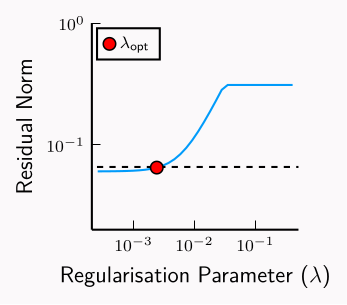

In [29]:
pgfplotsx()
using PGFPlotsX

empty!(PGFPlotsX.CUSTOM_PREAMBLE)
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"""
\usepackage[T1]{fontenc}
\usepackage{lmodern}
\renewcommand{\familydefault}{\sfdefault} % make all text sans-serif
"""
)

p = plot(λs[5:end-15], rs[5:end-15],
    xaxis=:log10, yaxis=:log10, ylims=(0.02, 1),
    xlabel=L"Regularisation Parameter ($\lambda$)", ylabel="Residual Norm",
    label="", marker=:circle, markersize=0, grid=:none, size=(200, 200),
    xticks=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    yticks=[0.1, 1, 10],
    bg=Colors.RGB(251 / 255, 249 / 255, 250 / 255),
    fg=:black,
    )
hline!([1.05 * δ], linestyle=:dash, color=:black, label="")
scatter!([λs[28]], [rs[28]], label=LaTeXStrings.L"\lambda_\mathsf{opt}", legend=:topleft, color=:red)
plot!(p, margins=0mm)

In [30]:
savefig(p, "../figures/Morozov/Poster/MDP_purple.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\Morozov\\Poster\\MDP_purple.svg"